### 훈련 세트와 테스트 세트
- 훈련 세트와 테스트 세트 분리

In [1]:
import pandas as pd 
import numpy as np

In [3]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2,
11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0,
475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0,
575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0,
920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8,
8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)] # 2차원 리스트[길이, 무게]
fish_target = [1] * 35 + [0]*14 # target 값 생성

In [6]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)  # 잘못된 데이터 나누기 방법

0.0

### Numpy 활용해서 샘플링하기
- 머신러닝에서는 list대신 numpy 주로 사용

In [17]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr)
print(input_arr.shape)  # 차원 확인

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
(49, 2)


In [18]:
np.random.seed(42)
index_list = np.arange(49)  # array를 만들어주는 range
np.random.shuffle(index_list)
print(index_list)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [20]:
# 훈련 세트 생성
train_input = input_arr[index_list[:35]]
train_target = target_arr[index_list[:35]]
# 테스트 세트 생성
test_input = input_arr[index_list[35:]]
test_target = target_arr[index_list[35:]]

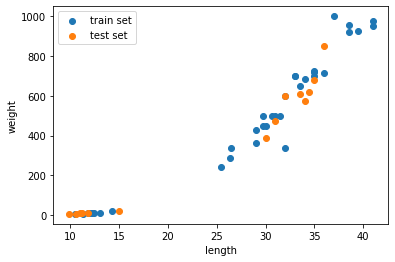

In [21]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:,1], label = 'train set')
plt.scatter(test_input[:, 0], test_input[:,1], label = 'test set')

plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [22]:
# fit -> score -> predict

kn = kn.fit(train_input, train_target)
print(f'점수 : {kn.score(test_input, test_target)}')
print(f'예상 : {kn.predict(test_input)}')
print(f'실제 : {test_target}')

점수 : 1.0
예상 : [0 0 1 0 1 1 1 0 1 1 0 1 1 0]
실제 : [0 0 1 0 1 1 1 0 1 1 0 1 1 0]


### 문제점 발생
- 길이 25cm, 무게 150g인 도미를 빙어로 판단
- 이유: 샘플 데이터의 두 특성(길이, 무게)의 스케일이 다르기 때문 -> 스케일을 조정(표준점수로 변환)해야 함

- column_stack(): numpy제공 함수- 리스트를 일렬로 세운 다음 차례대로 연결
    - python의 zip함수와 동일한 기능
    - column_stack((list1, list2)): 튜플 형태로 전달
- vstack : 아래쪽에 붙임(=concatenate(axis=0))
- hstack : 오른쪽에 붙임(=concatenate(axis=1))

In [4]:
import numpy as np
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [5]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [9]:
# 훈련세트와 테스트세트 나누는 함수: train_test_split()
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)
print(train_input.shape, test_input.shape)
print(train_target)
print(test_target)

(36, 2) (13, 2)
[1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.]
[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [11]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

print(kn.score(test_input, test_target))
# 위에 있던 '수상한 도미'
print(kn.predict([[25,150]]))  # 여전히 빙어로 분류


1.0
[0.]


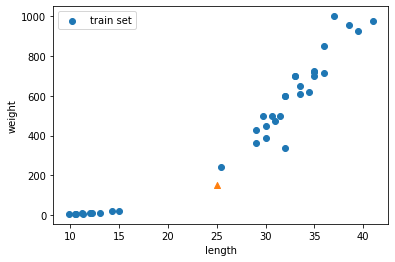

In [12]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:,1], label = 'train set')
plt.scatter(25,150, marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [15]:
### 가장 가까운 이웃과의 거리 계산
distances, indexes = kn.kneighbors([[25,150]])
print(distances)
print(indexes)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
[[21 33 19 30  1]]


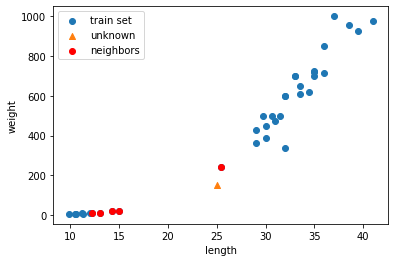

In [17]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:,1], label = 'train set')
plt.scatter(25,150, marker='^', label='unknown')
plt.scatter(train_input[indexes, 0], train_input[indexes,1], label = 'neighbors', color='r')

plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

### 무게와 길이의 크기차이가 너무 크기 때문에, 저런 왜곡이 생긴다. 

In [18]:
print(train_input[indexes])
print(train_target[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
[[1. 0. 0. 0. 0.]]


### scale 동일하게 수정

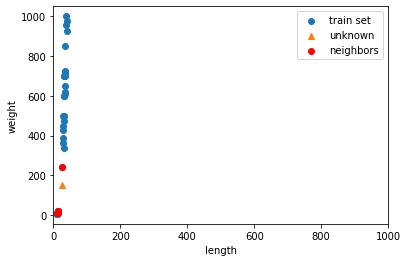

In [22]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:,1], label = 'train set')
plt.scatter(25,150, marker='^', label='unknown')
plt.scatter(train_input[indexes, 0], train_input[indexes,1], label = 'neighbors', color='r')

plt.xlim((0,1000) ) #x축의 눈금을 y축과 동일하게 변경
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

### 데이터 전처리

In [25]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [27]:
# 표준점수로 변환
train_scaled = (train_input - mean) / std
print(train_scaled[:3])

[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]]


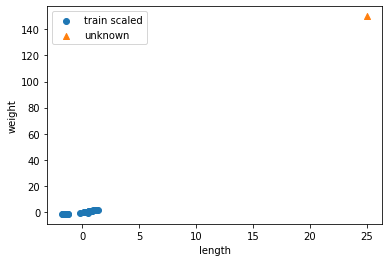

In [28]:
import matplotlib.pyplot as plt

plt.scatter(train_scaled[:, 0], train_scaled[:,1], label = 'train scaled')
plt.scatter(25,150, marker='^', label='unknown')

plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

# [25,150] 점도 스케일링을 해주자

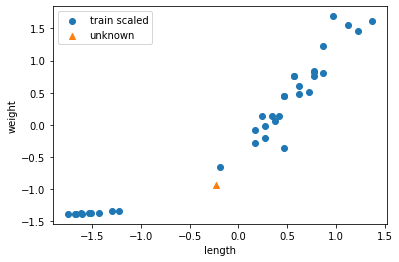

In [30]:
import matplotlib.pyplot as plt

new = ([25,150]-mean)/std

plt.scatter(train_scaled[:, 0], train_scaled[:,1], label = 'train scaled')
plt.scatter(new[0], new[1], marker='^', label='unknown')

plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [33]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
# kNN training
kn.fit(train_scaled, train_target)

# 테스트 점수를 표준점수로 변환
test_scaled = (test_input-mean)/ std
new = ([25,150]-mean)/std
print(kn.score(test_scaled, test_target))

# 표준 점수로 변환된 샘플 데이터를 가지고 예측
print(kn.predict([new]))

1.0
[1.]


### 최종 이웃 찾기 및 산점도

[[0.2873737  0.7711188  0.89552179 0.91493515 0.95427626]]


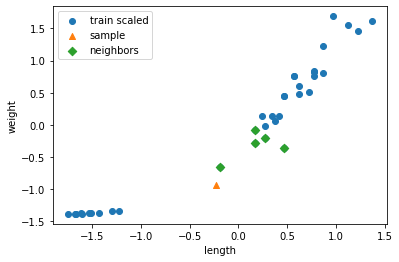

In [37]:
# 표준 점수로 변경된 샘플 데이터의 이웃 찾기 및 산점도
distances, indexes = kn.kneighbors([new])
print(distances)

plt.scatter(train_scaled[:,0], train_scaled[:,1], label='train scaled')
plt.scatter(new[0], new[1], marker='^', label='sample')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes,1], marker='D', label='neighbors')

plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

### 마무리 정리
- 특성의 스케일이 다른 경우
    - 길이보다 무게에 따라 예측값이 변경되었음
- 스케일이 다른 특성 처리
    - 훈련 세트 및 테스트 세트를 표준 점수로 변환
- 데이터 전처리
- scikit-learn 함수 정리
    - train_test_split()
        - 입력 데이터를 훈련 세트와 테스트 세트로 자동으로 나눔
        - 테스트 세트의 기본 크기 : 25%
    - kneighbors()
        - k-최근접 이웃모델에서 입력한 샘플 데이터와 가장 가까운 이웃을 찾음